# Airbnb Machine Learning - Clustering

1. Import librarirs and data and renaming columns
2. The elbow technique
3. k-mean clustering

## 1. Importing libraries and Data and Renaming Columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\lizan\Desktop\Data Analytics\07-22 Airbnb Toronto Analysis'

In [4]:
bnb = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'Listings_Calendar_Combined.pkl'))

In [5]:
bnb.shape

(5537417, 25)

In [6]:
bnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price_x,...,availability_365,number_of_reviews_ltm,license,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights,_merge
0,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.6459,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-06,f,469.0,469.0,28.0,NaN,both
1,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.6459,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-07,f,469.0,469.0,28.0,NaN,both
2,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.6459,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-08,f,469.0,469.0,28.0,NaN,both
3,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.6459,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-09,f,469.0,469.0,28.0,NaN,both
4,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.6459,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-10,f,469.0,469.0,28.0,NaN,both


In [7]:
bnb.drop(columns=['Unnamed: 0'])

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price_x,minimum_nights_x,...,availability_365,number_of_reviews_ltm,license,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights,_merge
0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,28.0,...,0,0,NaN,2022-06-06,f,469.0,469.0,28.0,NaN,both
1,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,28.0,...,0,0,NaN,2022-06-07,f,469.0,469.0,28.0,NaN,both
2,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,28.0,...,0,0,NaN,2022-06-08,f,469.0,469.0,28.0,NaN,both
3,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,28.0,...,0,0,NaN,2022-06-09,f,469.0,469.0,28.0,NaN,both
4,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,28.0,...,0,0,NaN,2022-06-10,f,469.0,469.0,28.0,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5537412,40719607,Modern Guest Suite Near Steeles and Yonge,316011180,Shijin,Newtonbrook West,43.79784,-79.43334,Entire home/apt,108.0,1.0,...,81,36,NaN,2023-05-31,f,108.0,108.0,1.0,30.0,both
5537413,40719607,Modern Guest Suite Near Steeles and Yonge,316011180,Shijin,Newtonbrook West,43.79784,-79.43334,Entire home/apt,108.0,1.0,...,81,36,NaN,2023-06-01,f,108.0,108.0,1.0,30.0,both
5537414,40719607,Modern Guest Suite Near Steeles and Yonge,316011180,Shijin,Newtonbrook West,43.79784,-79.43334,Entire home/apt,108.0,1.0,...,81,36,NaN,2023-06-02,f,108.0,108.0,1.0,30.0,both
5537415,40719607,Modern Guest Suite Near Steeles and Yonge,316011180,Shijin,Newtonbrook West,43.79784,-79.43334,Entire home/apt,108.0,1.0,...,81,36,NaN,2023-06-03,f,108.0,108.0,1.0,30.0,both


In [8]:
# rename price_x to list_price and price_y to booked_price
bnb.rename(columns= {'price_x' : 'list_price', 'price_y' : 'booked_price'}, inplace = True)

In [9]:
# drop duplicated minimum_nights column
bnb.drop(columns = ['minimum_nights_x'])

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,list_price,...,availability_365,number_of_reviews_ltm,license,date,available,booked_price,adjusted_price,minimum_nights_y,maximum_nights,_merge
0,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-06,f,469.0,469.0,28.0,NaN,both
1,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-07,f,469.0,469.0,28.0,NaN,both
2,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-08,f,469.0,469.0,28.0,NaN,both
3,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-09,f,469.0,469.0,28.0,NaN,both
4,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469.0,...,0,0,NaN,2022-06-10,f,469.0,469.0,28.0,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5537412,15170,40719607,Modern Guest Suite Near Steeles and Yonge,316011180,Shijin,Newtonbrook West,43.79784,-79.43334,Entire home/apt,108.0,...,81,36,NaN,2023-05-31,f,108.0,108.0,1.0,30.0,both
5537413,15170,40719607,Modern Guest Suite Near Steeles and Yonge,316011180,Shijin,Newtonbrook West,43.79784,-79.43334,Entire home/apt,108.0,...,81,36,NaN,2023-06-01,f,108.0,108.0,1.0,30.0,both
5537414,15170,40719607,Modern Guest Suite Near Steeles and Yonge,316011180,Shijin,Newtonbrook West,43.79784,-79.43334,Entire home/apt,108.0,...,81,36,NaN,2023-06-02,f,108.0,108.0,1.0,30.0,both
5537415,15170,40719607,Modern Guest Suite Near Steeles and Yonge,316011180,Shijin,Newtonbrook West,43.79784,-79.43334,Entire home/apt,108.0,...,81,36,NaN,2023-06-03,f,108.0,108.0,1.0,30.0,both


In [10]:
#rename minimum_nights_x to minimum_nights
bnb.rename(columns= {'minimum_nights_x' : 'minimum_nights'}, inplace = True)

## 2. The elbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
# Select column to be in a subset that includes numerical data
columns = ["booked_price",
          "availability_365",
          "number_of_reviews",
          "minimum_nights_y"]

In [13]:
bnb_int = bnb[columns]

In [14]:
bnb_int.head()

,booked_price,availability_365,number_of_reviews,minimum_nights_y
0,469.0,0,7,28.0
1,469.0,0,7,28.0
2,469.0,0,7,28.0
3,469.0,0,7,28.0
4,469.0,0,7,28.0


In [15]:
bnb_int = bnb_int.fillna(-1)

In [16]:
score = [kmeans[i].fit(bnb_int).score(bnb_int) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-383437072850.91003,
 -222845550945.14874,
 -152221115311.9498,
 -105664854524.10333,
 -82801827057.4114,
 -72752042492.31,
 -64434443541.6173,
 -56585946170.697815,
 -49180347237.51813]

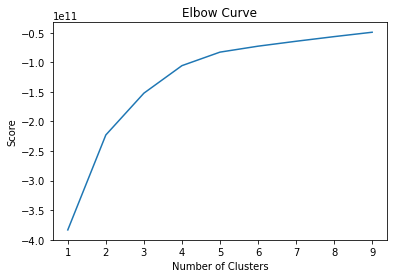

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow curve begins to straighten out at 5 clusters.  The optimal number of clusters (k) is 5

# 3. k-means Clustering

In [18]:
kmeans = KMeans(n_clusters = 5)

In [19]:
# Fit the k-means object to the data.

kmeans.fit(bnb_int)

KMeans(n_clusters=5)

In [20]:
bnb_int['clusters'] = kmeans.fit_predict(bnb_int)

In [21]:
bnb_int.head()

,booked_price,availability_365,number_of_reviews,minimum_nights_y,clusters
0,469.0,0,7,28.0,0
1,469.0,0,7,28.0,0
2,469.0,0,7,28.0,0
3,469.0,0,7,28.0,0
4,469.0,0,7,28.0,0


In [22]:
bnb_int['clusters'].value_counts()

1    3047079
2    1613844
0     715254
4     132178
3      29062
Name: clusters, dtype: int64

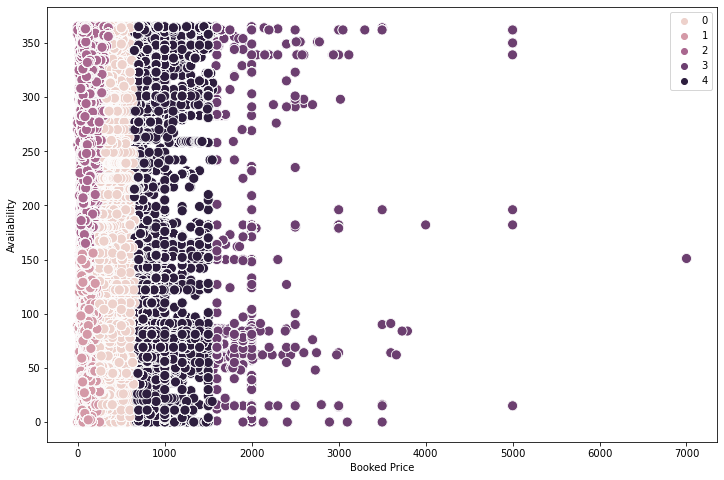

In [23]:
# Plot the clusters for the "booked Price" and "Availibility" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bnb_int['booked_price'], y=bnb_int['availability_365'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Booked Price') # Label x-axis.
plt.ylabel('Availability') # Label y-axis.
plt.show()

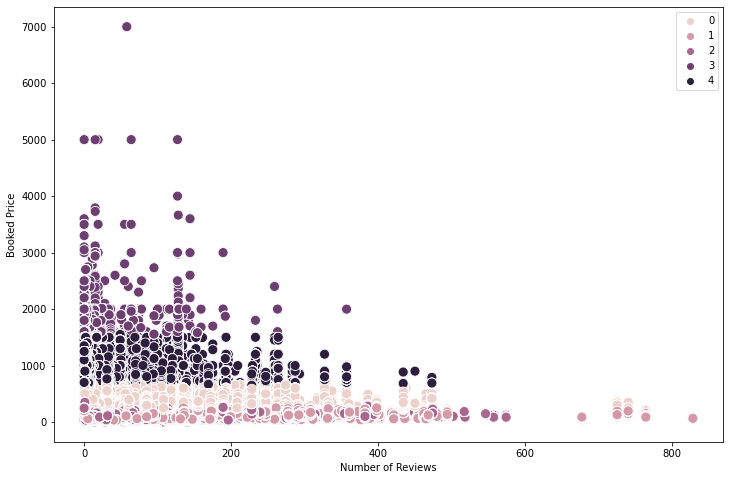

In [24]:
# Plot the clusters for the "Booked Price" and "Number of Reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bnb_int['number_of_reviews'], y=bnb_int['booked_price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Reviews') 
plt.ylabel('Booked Price') 
plt.show()

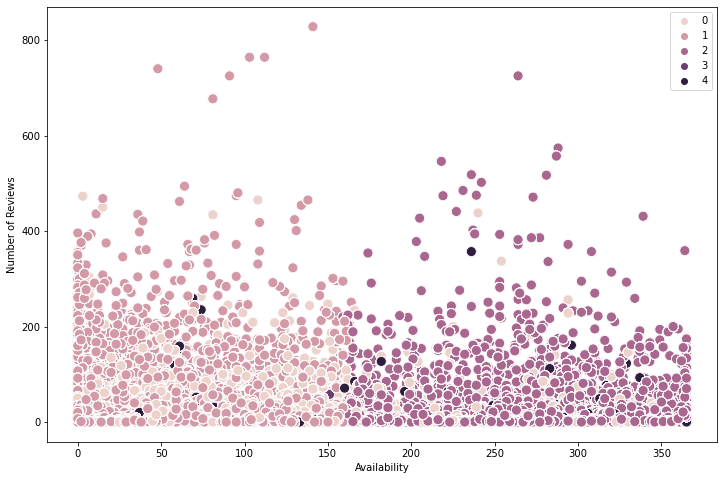

In [25]:
# Plot the clusters for the "Availibility" and "Number of Reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bnb_int['availability_365'], y=bnb_int['number_of_reviews'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Availability') 
plt.ylabel('Number of Reviews') 
plt.show()

In [26]:
bnb_int.loc[bnb_int['clusters'] == 4, 'cluster'] = 'dark purple'
bnb_int.loc[bnb_int['clusters'] == 3, 'cluster'] = 'purple'
bnb_int.loc[bnb_int['clusters'] == 1, 'cluster'] = 'pink'
bnb_int.loc[bnb_int['clusters'] == 0, 'cluster'] = 'peach'
bnb_int.loc[bnb_int['clusters'] == 2, 'cluster'] = 'rose'

In [27]:
bnb_int.groupby('cluster').agg({'booked_price':['mean', 'median'], 
                         'availability_365':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'],
                          'minimum_nights_y':['mean', 'median']})

booked_price         availability_365        number_of_reviews  \
                    mean  median             mean median              mean   
cluster                                                                      
dark purple   942.017386   959.0       156.024611  117.0         20.205851   
peach         367.568084   349.0       113.503353   87.0         27.627447   
pink          111.558064   100.0        36.291732    2.0         28.241010   
purple       2166.809476  1999.0       127.728511   72.0          9.006400   
rose          127.844139   114.0       284.925909  293.0         25.892058   

                   minimum_nights_y         
            median             mean median  
cluster                                     
dark purple    4.0        15.726694    6.0  
peach          7.0        14.935724    7.0  
pink           6.0        22.101403   28.0  
purple         1.0        22.064483   28.0  
rose           6.0        20.703263   28.0

Dark Purple: Highest priced listings, with the lowest number of reviews and mid range availability - this would be a very niche markert


Peach: Lowest priced listings, with the most reviews and most availibility - these are very affordable, very short term rentals


Pink: Second highest price tier, mid-range reviews and second least available - Higher priced units, with more reviews and more bookings


Purple: Mid Range Price, second highest number of reviews, and mid availability - the mid-range listing options, highly reviewed and selective availability. 


Rose: Second lowest price, mid range reviews and least availability - Most commonly booked listings, affordable and reviewed

In [28]:
bnb_int.to_pickle(os.path.join(path,'02 Data','Prepared Data','Clustering_Integers.pkl'))

In [31]:
bnb.loc[bnb_int['clusters'] == 4, 'cluster'] = 'dark purple'
bnb.loc[bnb_int['clusters'] == 3, 'cluster'] = 'purple'
bnb.loc[bnb_int['clusters'] == 1, 'cluster'] = 'pink'
bnb.loc[bnb_int['clusters'] == 0, 'cluster'] = 'peach'
bnb.loc[bnb_int['clusters'] == 2, 'cluster'] = 'rose'

In [32]:
bnb.columns

Index(['Unnamed: 0', 'listing_id', 'name', 'host_id', 'host_name',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'list_price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'date',
       'available', 'booked_price', 'adjusted_price', 'minimum_nights_y',
       'maximum_nights', '_merge', 'cluster'],
      dtype='object')

In [33]:
bnb.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,list_price,...,number_of_reviews_ltm,license,date,available,booked_price,adjusted_price,minimum_nights_y,maximum_nights,_merge,cluster
0,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.6459,-79.42423,Entire home/apt,469.0,...,0,NaN,2022-06-06,f,469.0,469.0,28.0,NaN,both,peach
1,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.6459,-79.42423,Entire home/apt,469.0,...,0,NaN,2022-06-07,f,469.0,469.0,28.0,NaN,both,peach
2,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.6459,-79.42423,Entire home/apt,469.0,...,0,NaN,2022-06-08,f,469.0,469.0,28.0,NaN,both,peach
3,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.6459,-79.42423,Entire home/apt,469.0,...,0,NaN,2022-06-09,f,469.0,469.0,28.0,NaN,both,peach
4,0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.6459,-79.42423,Entire home/apt,469.0,...,0,NaN,2022-06-10,f,469.0,469.0,28.0,NaN,both,peach


In [34]:
bnb.to_csv(os.path.join(path,'02 Data','Prepared Data','Clustered_Listing.csv'))